# Stemgraphic overview

Stemgraphic is be available for installation from pypi by using:

    pip3 install stemgraphic

In [1]:
!/usr/local/bin/pip3 freeze | grep stemgraphic

You are using pip version 8.0.2, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
stemgraphic==0.3.3


In [2]:
%matplotlib inline
import stemgraphic
import matplotlib.pyplot as plt

# Help for module

In [3]:
help(stemgraphic)

Help on package stemgraphic:

NAME
    stemgraphic - stem_graphic

DESCRIPTION
    Module implementing a text and a graphical stem-and-leaf plot function. stem_graphic provides
    horizontal, vertical or mirrored layouts, sorted in ascending or descending order, with sane
    default settings for the visuals, legend, median and outliers.
    
    It also handles very large data sets through scaling, sampling, trimming and other techniques.
    
    See research paper () for more technical details.
    
    A command line utility was installed along with the module, allowing to process excel or csv
    files. See: stem -h

PACKAGE CONTENTS
    aliases
    graphic
    helpers
    text

FILE
    /Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/stemgraphic/__init__.py




# Command line tool

In [4]:
!stem -h

Stem.

Stem and leaf plot from a csv or excel spreadsheet using best defaults.

Usage:
    stem <input> [-c <column>] [-o <file>] [-d]
    stem -h | --help
    stem --version

Options:
    -h --help    Show this screen.
    -c <column>  column index
    -d           describe the data
    -o <file>    output file (.txt, .png)
    --version


In [5]:
!ls *.xlsx

excel_test.xlsx


In [6]:
!stem excel_test.xlsx

1
    ¡
  1 | 000
  2 | 000
  3 | 000
  4 | 000
  5 | 000
  6 | 000
  7 | 000
  8 | 000
  9 | 000
 10 | 000
    !
10
Key: 
10|0 => 10.0x1 = 10.0 


In [7]:
!stem excel_test.xlsx -c 7

20188
    ¡
  0 | 224
    | 56889
  1 | 001122233
    | 5555566666
  2 | 044
    !
237431
Key: 
2|0 => 2.0x100000 = 200000.0 


In [8]:
from stemgraphic import *

In [9]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'aliases',
 'exit',
 'get_ipython',
 'graphic',
 'helpers',
 'plt',
 'quit',
 'stem_data',
 'stem_graphic',
 'stem_hist',
 'stem_kde',
 'stem_line',
 'stem_text',
 'stemgraphic',
 'text',
 'ui']

# From rosetta code, a list.

In [10]:
x = [
    12, 127, 28, 42, 39, 113, 42, 18, 44, 118, 44, 37, 113, 124, 37, 48, 127, 36, 29, 31,
    125, 139, 131, 115, 105, 132, 104, 123, 35, 113, 122, 42, 117, 119, 58, 109, 23, 105,
    63, 27, 44, 105, 99, 41, 128, 121, 116, 125, 32, 61, 37, 127, 29, 113, 121, 58, 114,
    126, 53, 114, 96, 25, 109, 7, 31, 141, 46, 13, 27, 43, 117, 116, 27, 7, 68, 40, 31, 115,
    124, 42, 128, 52, 71, 118, 117, 38, 27, 106, 33, 117, 116, 111, 40, 119, 47, 105, 57,
    122, 109, 124, 115, 43, 120, 43, 27, 27, 18, 28, 48, 125, 107, 114, 34, 133, 45, 120,
    30, 127, 31, 116, 146
]

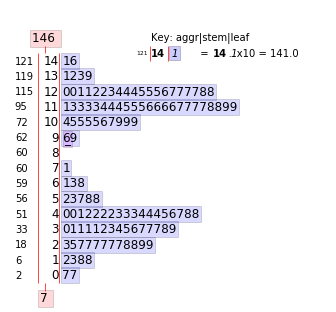

In [11]:
fig, ax = stem_graphic(x)
fig.savefig('1.png')
fig.savefig('1.svg')

# Synthetic data

In [12]:
import numpy as np

In [13]:
x = np.arange(150)**2

(<matplotlib.figure.Figure at 0x107ee0278>,
 <matplotlib.axes._axes.Axes at 0x107ec2198>)

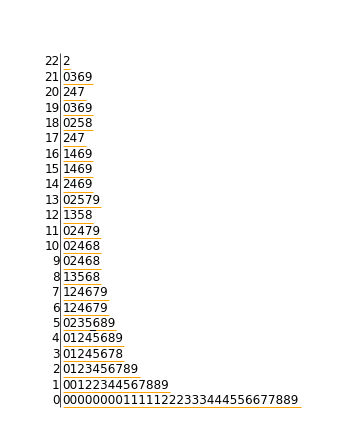

In [14]:
stem_graphic(x, aggregation=False, outliers=False, legend_pos=None,
             delimiter_color='k', alpha=0, underline_color='orange')

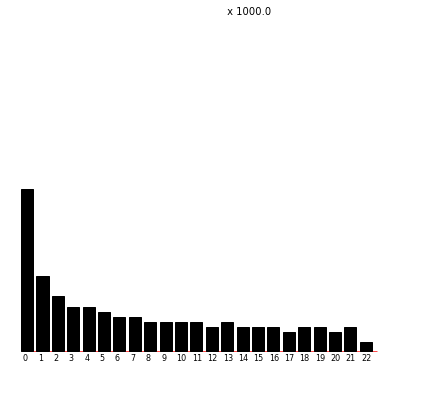

In [15]:
f, ax = stem_hist(x, color='k')

In [16]:
f.savefig('stem_hist.pdf', transparent=True)

# From R data()

In [17]:
%load_ext rpy2.ipython

In [18]:
%%R 
data(mtcars)
car_weight <- mtcars$wt

data(quakes)

In [19]:
%Rpull car_weight quakes

(<matplotlib.figure.Figure at 0x10c3e2da0>,
 <matplotlib.axes._axes.Axes at 0x10c53f1d0>)

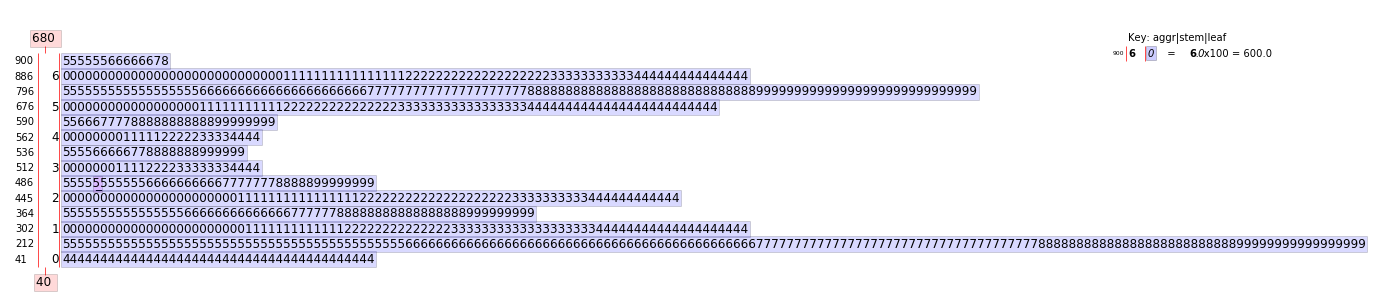

In [20]:
stem_graphic(quakes.depth)

(<matplotlib.figure.Figure at 0x10d6d5240>,
 <matplotlib.axes._axes.Axes at 0x10d6d5c50>)

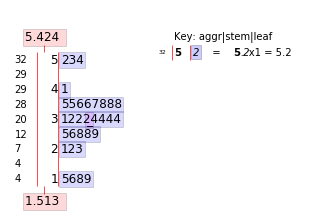

In [21]:
stem_graphic(car_weight)

# With Coconut

In [22]:
%load_ext coconut

(<matplotlib.figure.Figure at 0x10f9b0ba8>,
 <matplotlib.axes._axes.Axes at 0x10f92a358>)

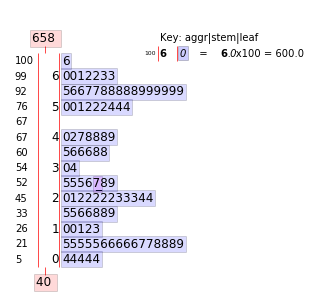

In [23]:
%%coconut
from random import sample
from stemgraphic import stem_graphic

# Build a pipeline. 

(quakes.depth |> list, 100) |*> sample |> list |> stem_graphic